# Building a Single-Layer Neural Network for Performing Binary Classification

In this activity, we will use a Keras sequential model to build a binary classifier. The simulated dataset provided represents the testing results of the production of aircraft propellers. Our target variable will be the results of the manual inspection of the propellers, designated as either "pass" (represented as a value of 1) or "fail" (represented as a value of 0).

Our goal is to classify the testing results into either "pass" or "fail" classes to match the manual inspections. We will use models with different architectures and observe the visualization of the different models' performance. This will help you gain a better sense of how going from one processing unit to a layer of processing units changes the flexibility and performance of the model.

Assume that this dataset contains two features representing the test results of two different tests inspecting the aircraft propellers of over 3000 propellers (the two features are normalized to have a mean of zero). The output is the likelihood of the propeller passing the test, with 1 representing a pass and zero representing a fail. The company would like to rely less on time-consuming, error-prone manual inspections of the aircraft propellers and shift resources to developing automated tests to assess the propellers faster. Therefore, the goal is to build a model that can predict whether an aircraft propeller will pass the manual inspection when given the results from the two tests. In this activity, you will 

- first build a logistic regression model, 
- then a single-layer neural network with three units, and 
- finally a single-layer neural network with six units, to perform the classification.

### 1. Import the required packages

In [48]:
# import required packages from Keras
from keras.models import Sequential 
from keras.layers import Dense, Activation 
import numpy as np
import pandas as pd
from tensorflow import random
from sklearn.model_selection import train_test_split
# import required packages for plotting
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 
import matplotlib.patches as mpatches
# import the function for plotting decision boundary
from utils import plot_decision_boundary

### 2. Set up a seed for a random number generator so that the results will be reproducible

In [28]:
seed = 1
np.random.seed(seed)
random.set_seed(seed)

### 3. Load the dataset using the read_csv function from the pandas library. Print the X and Y sizes and the number of examples in the training dataset using feats.shape, target.shape, and feats.shape[0]:

In [29]:
feats = pd.read_csv('../data/outlier_feats.csv')
target = pd.read_csv('../data/outlier_target.csv')

In [30]:
print("X size = ", feats.shape)
print("Y size = ", target.shape)
print("Number of examples = ", feats.shape[0])

X size =  (3359, 2)
Y size =  (3359, 1)
Number of examples =  3359


In [31]:
feats

feature1  feature2
0     0.541336 -0.074795
1     0.626001 -0.572346
2    -0.030819 -0.716368
3    -0.147079 -0.478156
4    -0.771144  0.431074
...        ...       ...
3354  0.599094 -0.168325
3355  0.364545  0.064491
3356 -0.424160 -0.162835
3357  0.212499 -0.389776
3358 -0.329276 -0.257117

[3359 rows x 2 columns]

### 4. Plot the dataset

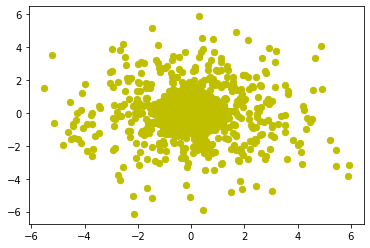

In [32]:
plt.scatter(
    feats.iloc[:,0], 
    feats.iloc[:,1], 
    s=40, 
    c='Y', 
    cmap=plt.cm.Spectral
)

Text(0, 0.5, 'Feature 2')

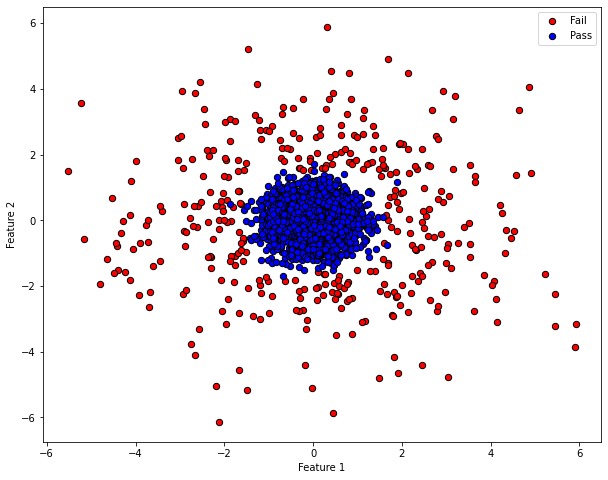

In [33]:
# changing the size of the plots
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

class_1 = plt.scatter(
    feats.loc[target['Class']==0,'feature1'], 
    feats.loc[target['Class']==0,'feature2'], 
    c="red", 
    s=40, 
    edgecolor='k'
)

class_2 = plt.scatter(
    feats.loc[target['Class']==1,'feature1'], 
    feats.loc[target['Class']==1,'feature2'], 
    c="blue", 
    s=40, 
    edgecolor='k'
)

plt.legend((class_1, class_2),('Fail','Pass'))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

### 5. Implement a logistic regression model as a sequential model in Keras. Remember that the activation function for binary classification needs to be sigmoid.

In [34]:
np.random.seed(seed)
random.set_seed(seed)

model1 = Sequential()
model1.add(Dense(1, input_dim=2, activation='sigmoid'))

### 6. Train the model with optimizer='sgd', loss='binary_crossentropy', batch_size = 5, epochs = 100, and shuffle=False. Observe the loss values in each iteration by using verbose=1 and validation_split=0.2.

In [35]:
model1.compile(
    optimizer='sgd',
    loss='binary_crossentropy', 
)

In [36]:
history = model1.fit(
    x=feats,
    y=target,
    batch_size = 5,
    epochs=100,
    shuffle=False,
    verbose=1,
    validation_split=0.2,
)

Train on 2687 samples, validate on 672 samples
Epoch 1/100
2687/2687 [==============================] - 2s 758us/step - loss: 0.5405 - val_loss: 0.4194
Epoch 2/100
2687/2687 [==============================] - 2s 674us/step - loss: 0.3729 - val_loss: 0.3672
Epoch 3/100
2687/2687 [==============================] - 1s 527us/step - loss: 0.3459 - val_loss: 0.3574
Epoch 4/100
2687/2687 [==============================] - 1s 524us/step - loss: 0.3396 - val_loss: 0.3551
Epoch 5/100
2687/2687 [==============================] - 2s 772us/step - loss: 0.3378 - val_loss: 0.3545
Epoch 6/100
2687/2687 [==============================] - 2s 715us/step - loss: 0.3371 - val_loss: 0.3543
Epoch 7/100
2687/2687 [==============================] - 2s 698us/step - loss: 0.3369 - val_loss: 0.3543
Epoch 8/100
2687/2687 [==============================] - 2s 718us/step - loss: 0.3368 - val_loss: 0.3542
Epoch 9/100
2687/2687 [==============================] - 3s 1ms/step - loss: 0.3367 - val_loss: 0.3542
Epoch 10/1

In [37]:
print(history.history.keys())

dict_keys(['val_loss', 'loss'])


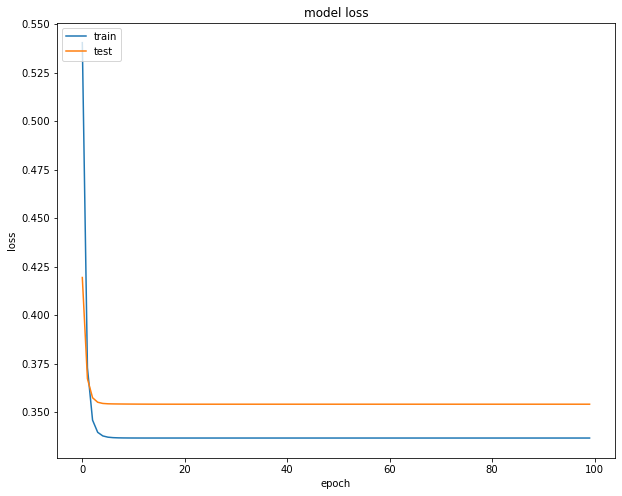

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 7. Plot the decision boundary of the trained model

Text(0.5, 1.0, 'Logistic Regression')

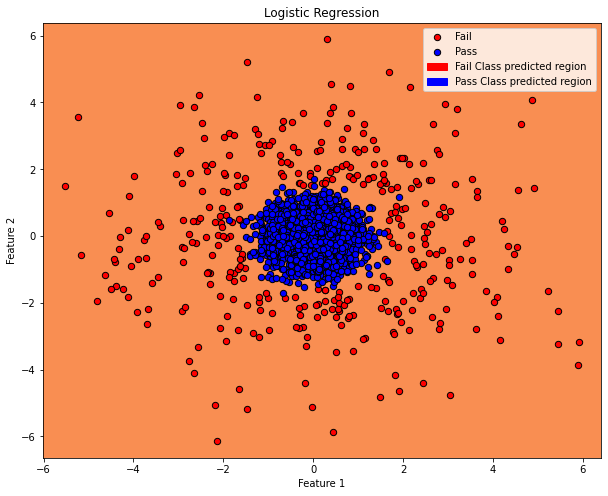

In [51]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model1.predict(x), feats, target) 
plt.title("Logistic Regression")

The linear decision boundary of the logistic regression model is obviously unable to capture the circular decision boundary between the two classes and predicts all the results as a passed result.

### 8. Implement a single-layer neural network with three nodes in the hidden layer and the ReLU activation function for 200 epochs. It is important to remember that the activation function for the output layer still needs to be sigmoid since it is a binary classification problem. Choosing ReLU or having no activation function for the output layer will not produce outputs that can be interpreted as class labels. Train the model with verbose=1 and observe the loss in every iteration. After the model has been trained, plot the decision boundary and evaluate the loss and accuracy on the test dataset.

In [52]:
np.random.seed(seed)
random.set_seed(seed)

model2 = Sequential()
model2.add(Dense(3, input_dim=2, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [53]:
model2.compile(
    optimizer='sgd',
    loss='binary_crossentropy', 
)

In [54]:
history2 = model2.fit(
    x=feats,
    y=target,
    batch_size = 5,
    epochs=200,
    shuffle=False,
    verbose=1,
    validation_split=0.2,
)

=========================] - 2s 613us/step - loss: 0.0949 - val_loss: 0.1066
Epoch 14/200
2687/2687 [==============================] - 2s 702us/step - loss: 0.0909 - val_loss: 0.1030
Epoch 15/200
2687/2687 [==============================] - 2s 810us/step - loss: 0.0873 - val_loss: 0.1000
Epoch 16/200
2687/2687 [==============================] - 2s 747us/step - loss: 0.0840 - val_loss: 0.0973
Epoch 17/200
2687/2687 [==============================] - 2s 715us/step - loss: 0.0811 - val_loss: 0.0948
Epoch 18/200
2687/2687 [==============================] - 2s 627us/step - loss: 0.0784 - val_loss: 0.0925
Epoch 19/200
2687/2687 [==============================] - 2s 752us/step - loss: 0.0759 - val_loss: 0.0902
Epoch 20/200
2687/2687 [==============================] - 2s 826us/step - loss: 0.0736 - val_loss: 0.0881
Epoch 21/200
2687/2687 [==============================] - 2s 723us/step - loss: 0.0714 - val_loss: 0.0861
Epoch 22/200
2687/2687 [==============================] - 2s 720us/step - l

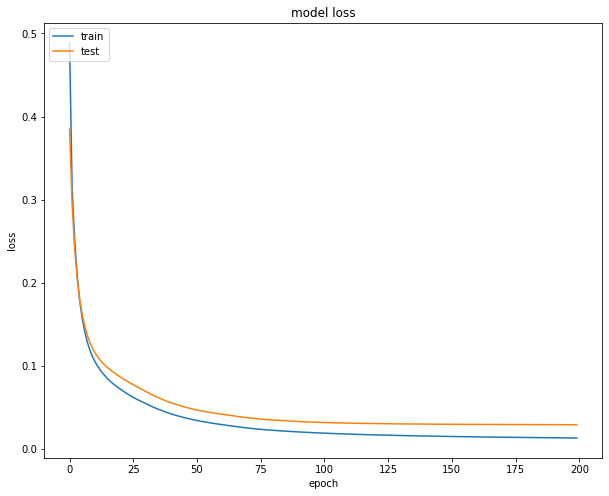

In [55]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'Decision Boundary for Neural Network with hidden layer size 3')

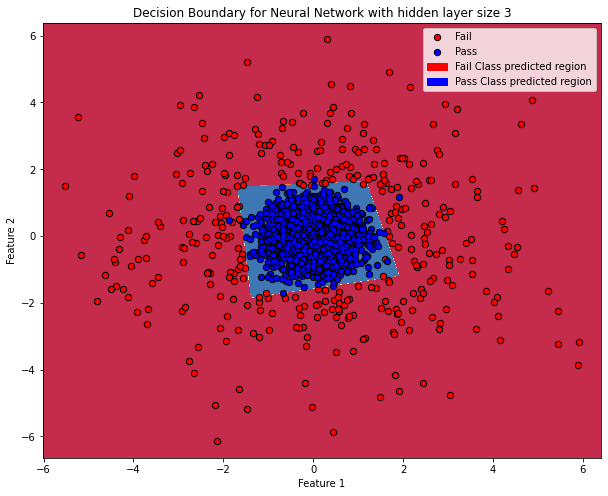

In [56]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model2.predict(x), feats, target) 
plt.title("Decision Boundary for Neural Network with hidden layer size 3")

Having three processing units instead of one dramatically improved the capability of the model in capturing the non-linear boundary between the two classes. Notice that the loss value decreased drastically in comparison to the previous step.

### 9. Repeat step 8 for the hidden layer of size 6 and 400 epochs and compare the final loss value and the decision boundary plot.

In [57]:
np.random.seed(seed)
random.set_seed(seed)

model3 = Sequential()
model3.add(Dense(6, input_dim=2, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(
    optimizer='sgd',
    loss='binary_crossentropy', 
)

history3 = model3.fit(
    x=feats,
    y=target,
    batch_size = 5,
    epochs=400,
    shuffle=False,
    verbose=1,
    validation_split=0.2,
)

poch 214/400
2687/2687 [==============================] - 2s 655us/step - loss: 0.0091 - val_loss: 0.0238
Epoch 215/400
2687/2687 [==============================] - 1s 367us/step - loss: 0.0091 - val_loss: 0.0238
Epoch 216/400
2687/2687 [==============================] - 1s 395us/step - loss: 0.0091 - val_loss: 0.0238
Epoch 217/400
2687/2687 [==============================] - 1s 458us/step - loss: 0.0091 - val_loss: 0.0238
Epoch 218/400
2687/2687 [==============================] - 1s 361us/step - loss: 0.0091 - val_loss: 0.0238
Epoch 219/400
2687/2687 [==============================] - 1s 360us/step - loss: 0.0091 - val_loss: 0.0238
Epoch 220/400
2687/2687 [==============================] - 1s 365us/step - loss: 0.0090 - val_loss: 0.0238
Epoch 221/400
2687/2687 [==============================] - 1s 426us/step - loss: 0.0090 - val_loss: 0.0238
Epoch 222/400
2687/2687 [==============================] - 1s 381us/step - loss: 0.0090 - val_loss: 0.0238
Epoch 223/400
2687/2687 [=============

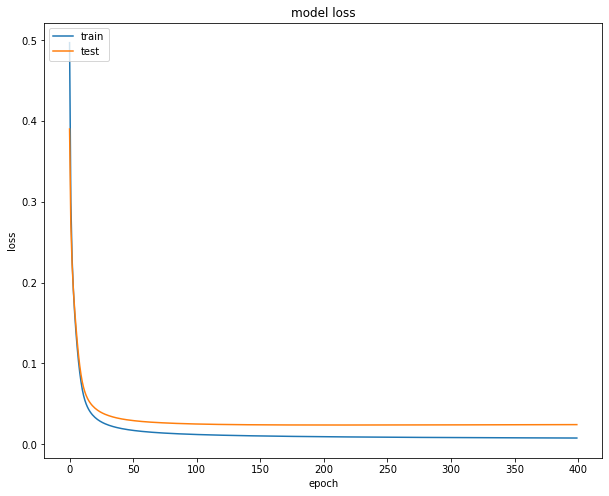

In [58]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'Decision Boundary for Neural Network with hidden layer size 6')

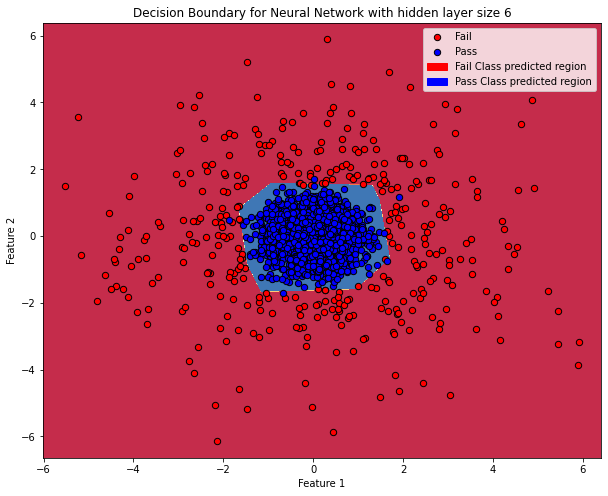

In [59]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model3.predict(x), feats, target) 
plt.title("Decision Boundary for Neural Network with hidden layer size 6") 

By doubling the number of units in the hidden layer, the decision boundary of the model gets closer to a true circular shape, and the loss value is decreased even more in comparison to the previous step.

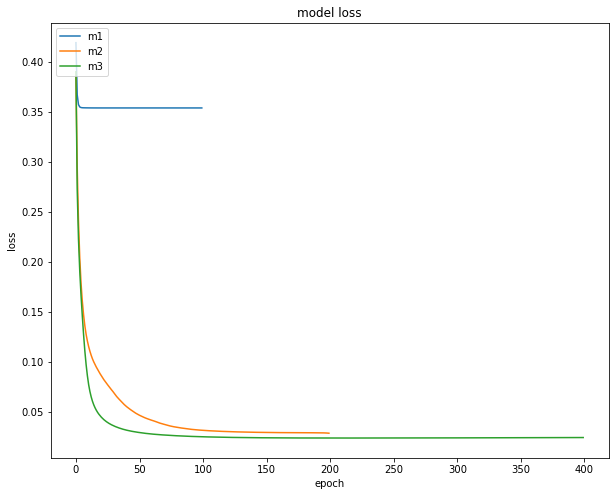

In [61]:
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['m1', 'm2', 'm3'], loc='upper left')
plt.show()

### 10. Repeat steps 8 and 9 using the tanh activation function for the hidden layer and compare the results with the models with relu activation. Which activation function do you think is a better choice for this problem?

In [65]:
np.random.seed(seed)
random.set_seed(seed)

model4 = Sequential()
model4.add(Dense(3, input_dim=2, activation='tanh'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(
    optimizer='sgd',
    loss='binary_crossentropy', 
)

history4 = model4.fit(
    x=feats,
    y=target,
    batch_size = 5,
    epochs=200,
    shuffle=False,
    verbose=1,
    validation_split=0.2,
)

[==============================] - 2s 579us/step - loss: 0.2165 - val_loss: 0.2248
Epoch 14/200
2687/2687 [==============================] - 1s 554us/step - loss: 0.2094 - val_loss: 0.2168
Epoch 15/200
2687/2687 [==============================] - 2s 632us/step - loss: 0.2029 - val_loss: 0.2095
Epoch 16/200
2687/2687 [==============================] - 1s 538us/step - loss: 0.1969 - val_loss: 0.2028
Epoch 17/200
2687/2687 [==============================] - 1s 503us/step - loss: 0.1913 - val_loss: 0.1966
Epoch 18/200
2687/2687 [==============================] - 2s 614us/step - loss: 0.1859 - val_loss: 0.1907
Epoch 19/200
2687/2687 [==============================] - 2s 632us/step - loss: 0.1807 - val_loss: 0.1849
Epoch 20/200
2687/2687 [==============================] - 2s 712us/step - loss: 0.1755 - val_loss: 0.1793
Epoch 21/200
2687/2687 [==============================] - 2s 654us/step - loss: 0.1700 - val_loss: 0.1737
Epoch 22/200
2687/2687 [==============================] - 2s 653us/st

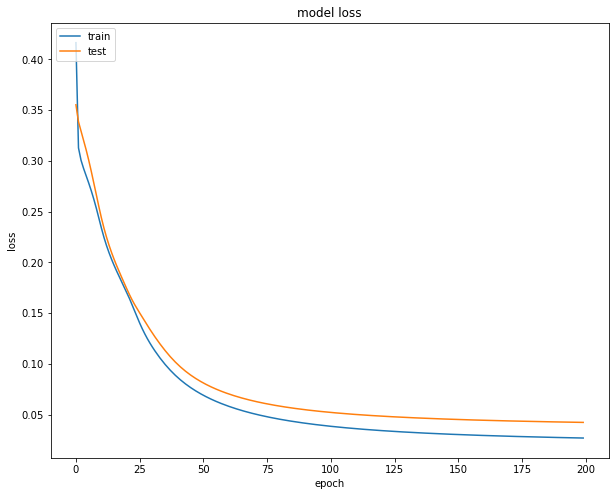

In [70]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'Decision Boundary for Neural Network with hidden layer size 3')

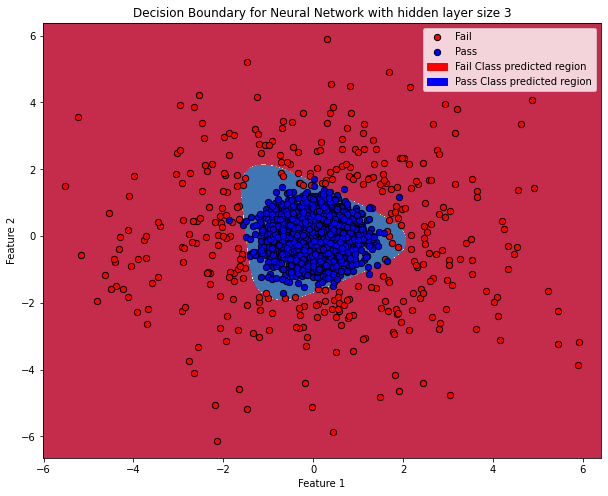

In [68]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model4.predict(x), feats, target) 
plt.title("Decision Boundary for Neural Network with hidden layer size 3")

Using the tanh activation function has eliminated the sharp edges in the decision boundary. In other words, it has made the decision boundary smoother. However, the model is not performing better since we can see an increase in the loss value. We achieved similar loss and accuracy scores when we evaluated on the test dataset, despite mentioning previously that the learning parameters for tanh are slower than they are for relu.

In [73]:
np.random.seed(seed)
random.set_seed(seed)

model5 = Sequential()
model5.add(Dense(6, input_dim=2, activation='tanh'))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(
    optimizer='sgd',
    loss='binary_crossentropy', 
)

history5 = model5.fit(
    x=feats,
    y=target,
    batch_size = 5,
    epochs=400,
    shuffle=False,
    verbose=1,
    validation_split=0.2,
)

1s 257us/step - loss: 0.0206 - val_loss: 0.0304
Epoch 217/400
2535/2687 [===========================>..] - ETA: 0s - loss: 0.0202687/2687 [==============================] - 1s 304us/step - loss: 0.0206 - val_loss: 0.0303
Epoch 218/400
2687/2687 [==============================] - 1s 338us/step - loss: 0.0205 - val_loss: 0.0303
Epoch 219/400
2687/2687 [==============================] - 1s 292us/step - loss: 0.0205 - val_loss: 0.0303
Epoch 220/400
2687/2687 [==============================] - 1s 272us/step - loss: 0.0205 - val_loss: 0.0302
Epoch 221/400
2687/2687 [==============================] - 1s 271us/step - loss: 0.0204 - val_loss: 0.0302
Epoch 222/400
2687/2687 [==============================] - 1s 259us/step - loss: 0.0204 - val_loss: 0.0302
Epoch 223/400
2687/2687 [==============================] - 1s 282us/step - loss: 0.0203 - val_loss: 0.0301
Epoch 224/400
2687/2687 [==============================] - 1s 282us/step - loss: 0.0203 - val_loss: 0.0301
Epoch 225/400
2687/2687 [=====

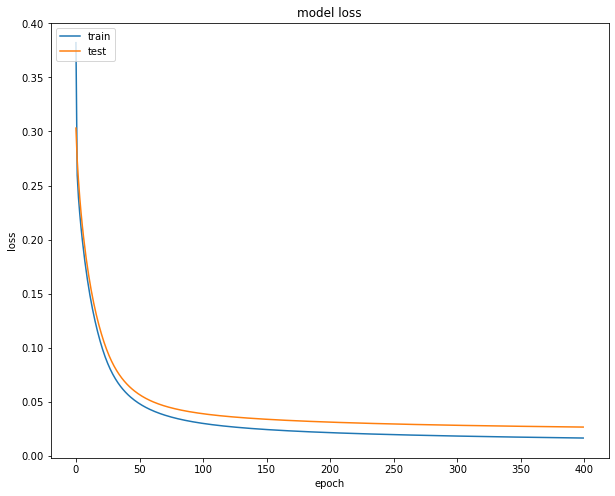

In [74]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'Decision Boundary for Neural Network with hidden layer size 6')

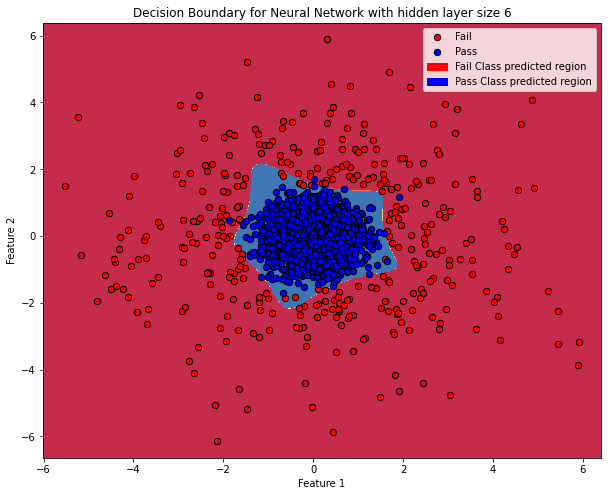

In [75]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plot_decision_boundary(lambda x: model5.predict(x), feats, target) 
plt.title("Decision Boundary for Neural Network with hidden layer size 6")

Again, using the tanh activation function instead of relu and adding more nodes to our hidden layer has smoothed the curves on the decision boundary more, fitting the training data better according to the accuracy of the training data. We should be careful not to add too many nodes to the hidden layer as we may begin to overfit the data. This can be observed by evaluating the test set, where there is a slight decrease in the accuracy of the neural network with six nodes compared to a neural network with three.

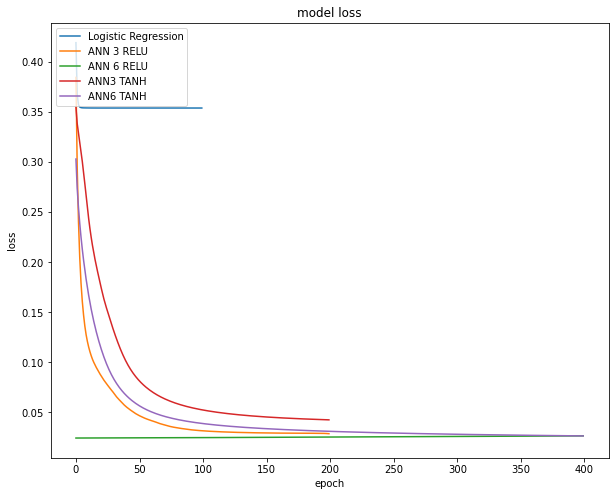

In [76]:
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['val_loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Logistic Regression', 'ANN 3 RELU', 'ANN 6 RELU', 'ANN3 TANH', 'ANN6 TANH'], loc='upper left')
plt.show()